### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key=""

In [3]:
df = pdr.get_data_tiingo('MSFT', api_key=key)

<ipython-input-3-7e177e74b516>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('MSFT', api_key=key)


In [4]:
df.to_csv('MSFT.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('MSFT.csv')

In [7]:
df.shape


(1256, 14)

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-08-22 00:00:00+00:00,107.06,107.34,105.78,105.85,18000639,101.405791,101.671004,100.193393,100.259696,18000639,0.0,1.0
1,MSFT,2018-08-23 00:00:00+00:00,107.56,108.18,106.87,107.15,18167723,101.879385,102.466640,101.225826,101.491038,18167723,0.0,1.0
2,MSFT,2018-08-24 00:00:00+00:00,108.40,108.56,107.56,107.67,17234020,102.675021,102.826571,101.879385,101.983575,17234020,0.0,1.0
3,MSFT,2018-08-27 00:00:00+00:00,109.60,109.64,108.51,109.27,19662331,103.811645,103.849533,102.779212,103.499074,19662331,0.0,1.0
4,MSFT,2018-08-28 00:00:00+00:00,110.26,110.50,109.79,109.94,19151528,104.436788,104.664113,103.991611,104.133689,19151528,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,MSFT,2023-08-14 00:00:00+00:00,324.04,324.06,320.0800,321.39,18836139,323.353731,323.373689,319.402118,320.709343,18836139,0.00,1.0
1252,MSFT,2023-08-15 00:00:00+00:00,321.86,325.09,320.9034,323.00,16966285,321.178348,324.401507,320.223774,322.315934,16966285,0.00,1.0
1253,MSFT,2023-08-16 00:00:00+00:00,320.40,324.42,319.8035,320.80,20698864,320.400000,324.420000,319.803500,320.800000,20698864,0.68,1.0
1254,MSFT,2023-08-17 00:00:00+00:00,316.88,321.87,316.2100,320.54,21257161,316.880000,321.870000,316.210000,320.540000,21257161,0.00,1.0
1255,MSFT,2023-08-18 00:00:00+00:00,316.48,318.38,311.5508,314.49,24755012,316.480000,318.380000,311.550800,314.490000,24755012,0.00,1.0


In [10]:
df1=df.reset_index()['high']

In [11]:
df1

0       107.34
1       108.18
2       108.56
3       109.64
4       110.50
         ...  
1251    324.06
1252    325.09
1253    324.42
1254    321.87
1255    318.38
Name: high, Length: 1256, dtype: float64

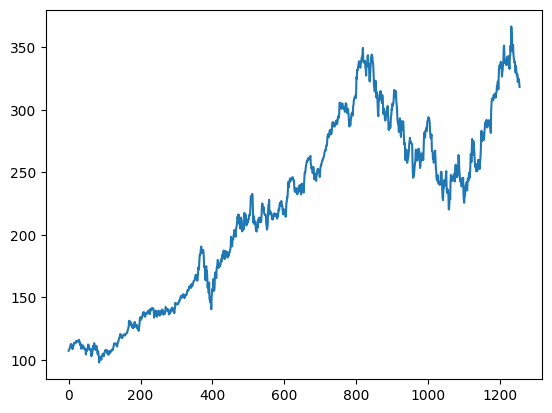

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:
import numpy as np

In [15]:
df1

0       107.34
1       108.18
2       108.56
3       109.64
4       110.50
         ...  
1251    324.06
1252    325.09
1253    324.42
1254    321.87
1255    318.38
Name: high, Length: 1256, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.03485733]
 [0.03798222]
 [0.03939586]
 ...
 [0.84241658]
 [0.83293032]
 [0.81994717]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(816, 440)

In [20]:
train_data

array([[0.03485733],
       [0.03798222],
       [0.03939586],
       [0.04341356],
       [0.04661285],
       [0.0523046 ],
       [0.05446226],
       [0.05509468],
       [0.05204419],
       [0.05003534],
       [0.0409955 ],
       [0.03999107],
       [0.04341356],
       [0.05066776],
       [0.05163498],
       [0.05862877],
       [0.05862877],
       [0.05851717],
       [0.05851717],
       [0.05710353],
       [0.05888918],
       [0.06443213],
       [0.06298129],
       [0.06372531],
       [0.0635765 ],
       [0.06301849],
       [0.06175365],
       [0.06588297],
       [0.06647818],
       [0.06774302],
       [0.06246047],
       [0.05654552],
       [0.0523046 ],
       [0.05621071],
       [0.05033295],
       [0.04077229],
       [0.04936572],
       [0.04281835],
       [0.04999814],
       [0.05148618],
       [0.04672445],
       [0.04795209],
       [0.04676165],
       [0.0409211 ],
       [0.03913545],
       [0.04203713],
       [0.04010267],
       [0.039

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(665, 150)
(665,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(289, 150)
(289,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 16s 282ms/step - loss: 0.0598 - val_loss: 0.0062
Epoch 2/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 3/100
11/11 [==============================] - 1s 46ms/step - loss: 0.0037 - val_loss: 0.0065
Epoch 4/100
11/11 [==============================] - 0s 40ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 5/100
11/11 [==============================] - 0s 45ms/step - loss: 9.5978e-04 - val_loss: 0.0030
Epoch 6/100
11/11 [==============================] - 1s 47ms/step - loss: 9.6763e-04 - val_loss: 0.0024
Epoch 7/100
11/11 [==============================] - 0s 44ms/step - loss: 8.3947e-04 - val_loss: 0.0021
Epoch 8/100
11/11 [==============================] - 1s 64ms/step - loss: 8.5382e-04 - val_loss: 0.0021
Epoch 9/100
11/11 [==============================] - 1s 85ms/step - loss: 8.3800e-04 - val_loss: 0.0025
Epoch 10/100
11/11 [==============================] - 1s 67ms/step - loss: 8.9

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.12.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 0s 7ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

210.02248013749238

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

280.0318225634248

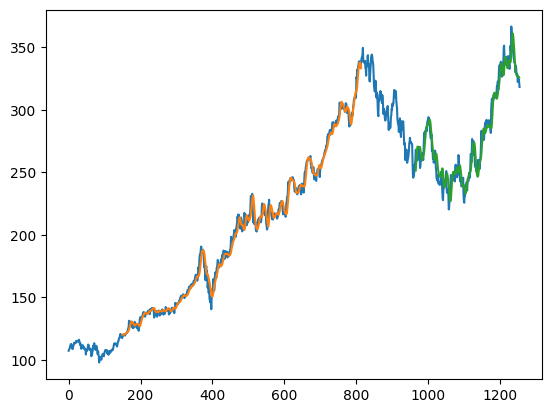

In [36]:
### Plotting
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

440

In [38]:
test_data.shape

(440, 1)

In [39]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.6628101633123769,
 0.6814099177857968,
 0.6937613928053272,
 0.7116550723559392,
 0.7079349726572672,
 0.7160444179904024,
 0.7037684609947548,
 0.7221085525092072,
 0.7128827052565012,
 0.6994159443473087,
 0.7032476470369406,
 0.7139987351661026,
 0.7087161935939885,
 0.7203229046538451,
 0.7208995201071391,
 0.7108366504222314,
 0.7107622484282579,
 0.7004947732599234,
 0.6955842416576765,
 0.6831219076671258,
 0.74997209925226,
 0.7709162605557831,
 0.7847922324318293,
 0.7835645995312677,
 0.7857222573564973,
 0.7836018005282543,
 0.7804493880435999,
 0.7961013355157922,
 0.7895167590491428,
 0.7889215430973553,
 0.7999330382054242,
 0.7929392507719208,
 0.7911908039135449,
 0.7884193296380344,
 0.8025743089914812,
 0.8052527807745249,
 0.8224024403854027,
 0.8213236114727878,
 0.8356087943156878,
 0.8360924072765152,
 0.8129533871507759,
 0.8516424240169638,
 0.8758230720583313,
 0.8845281053532237,
 0.8852721252929581,
 0.8763066850191585,
 0.8910754808228862,
 0.895018414493

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.84635866]
101
1 day output [[0.8466174]]
2 day output [[0.8492682]]
3 day output [[0.85378605]]
4 day output [[0.85957307]]
5 day output [[0.8661678]]
6 day output [[0.8732549]]
7 day output [[0.8806157]]
8 day output [[0.8880819]]
9 day output [[0.8955059]]
10 day output [[0.9027475]]
11 day output [[0.90967095]]
12 day output [[0.9161463]]
13 day output [[0.9220526]]
14 day output [[0.9272815]]
15 day output [[0.93173987]]
16 day output [[0.9353516]]
17 day output [[0.9380601]]
18 day output [[0.9398289]]
19 day output [[0.94064224]]
20 day output [[0.94050604]]
21 day output [[0.93944705]]
22 day output [[0.9375125]]
23 day output [[0.9347693]]
24 day output [[0.9313015]]
25 day output [[0.9272092]]
26 day output [[0.92260563]]
27 day output [[0.9176143]]
28 day output [[0.9123658]]
29 day output [[0.9069946]]
[[0.8463586568832397], [0.8466174006462097], [0.8492681980133057], [0.853786051273346], [0.8595730662345886], [0.8661677837371826], [0.8732548952102661], [0.880615711212158

In [43]:
predictions= scaler.inverse_transform(lst_output)

In [44]:
predictions

array([[325.47967056],
       [325.54922347],
       [326.26178431],
       [327.47622844],
       [329.03183593],
       [330.80456195],
       [332.70964838],
       [334.68830933],
       [336.69529775],
       [338.69094236],
       [340.63755866],
       [342.4986478 ],
       [344.23928109],
       [345.82696528],
       [347.23253972],
       [348.43099358],
       [349.40186633],
       [350.12993678],
       [350.60539927],
       [350.82403991],
       [350.78742889],
       [350.50276025],
       [349.98273969],
       [349.24532822],
       [348.31314938],
       [347.21310464],
       [345.9756204 ],
       [344.63389492],
       [343.22304913],
       [341.77921338]])

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
print(day_pred)

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130]


In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1256

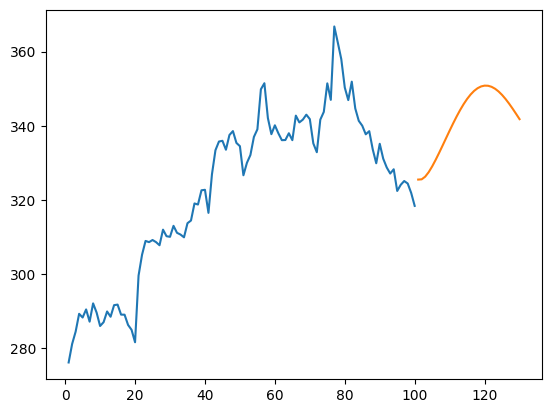

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

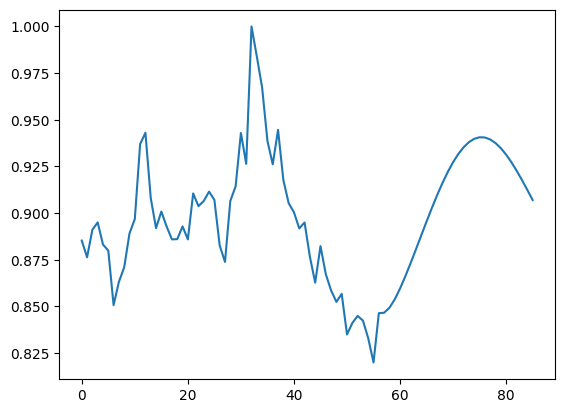

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

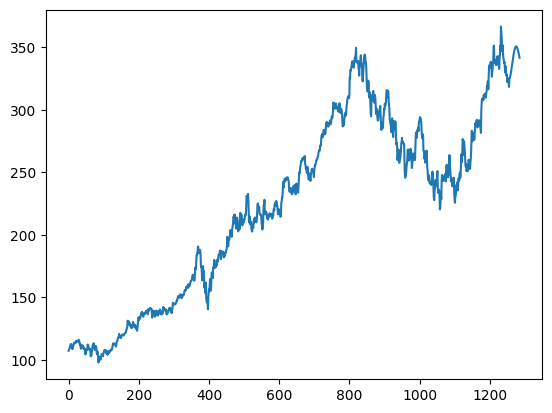

In [52]:
plt.plot(df3)